## Introduction ..

This notebook presents my trail to solve WUZZUF competition hereunder .. 

https://www.kaggle.com/WUZZUF/wuzzuf-job-posts/data

This competition dataset is a sample of jobs posted on WUZZUF and the corresponding applications, mainly during 2014 and 2015

In [1]:

## data manipulation
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats

## reading the data 
import json
import zipfile
import csv

from collections import Counter

# ## plotting .. 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from datetime import datetime


## warnings
import warnings
warnings.filterwarnings("ignore")

## 1. Applications Dataset:

In [2]:
df_app = pd.read_csv('Wuzzuf_Applications_Sample.csv')

In [3]:
df_app.head()

,id,user_id,job_id,app_date
0,ba7b8f17,846d013c,516e4ed,2014-01-01 07:27:52
1,30e1ae86,9d5e32c5,516e4ed,2014-01-01 08:20:42
2,d829a6b7,eb26a291,516e4ed,2014-01-01 10:30:37
3,3f985f37,7b5e68a8,516e4ed,2014-01-01 10:55:07
4,27e1695,76fa79b1,516e4ed,2014-01-01 11:00:26


In [4]:
np.shape(df_app)

(1854190, 4)

There are 1854190 applications in this dataset .. each of which contains 4 columns (i.e. id, user_id, job_id, and application_date)

What is the type of each variable .. 

In [5]:
df_app.columns.to_series().groupby(df_app.dtypes).groups

{dtype('O'): Index([u'id', u'user_id', u'job_id', u'app_date'], dtype='object')}

### Comment ..
ALL variables are considered (Categorical) .. 

And this makes sence except for app_date variable .. that has to be a date_time ! ..  

Are there any null values in this dataset ?!

In [6]:
df_app.isnull().any().any()

False

NO ! :)

Let's double check .. 

In [7]:
df_app.isnull().sum()

id          0
user_id     0
job_id      0
app_date    0
dtype: int64

Confirmed ! :) ..

None of the columns contains null values ..

## 2. Job Posts Dataset:

In [8]:
df_job = pd.read_csv('Wuzzuf_Job_Posts_Sample.csv')

In [9]:
df_job.head()

,id,city,job_title,job_category1,job_category2,job_category3,job_industry1,job_industry2,job_industry3,salary_minimum,salary_maximum,num_vacancies,career_level,experience_years,post_date,views,job_description,job_requirements,payment_period,currency
0,516e4ed,Ciro,Sales & Marketing Agent,Sales/Retail/Business Development,Marketing,Select,Telecommunications Services,Select,Select,2000,3500,8,Entry Level,0-1,2014-01-01 06:01:41,2602,<p><strong>Qualifications</strong>:<br /><br /...,NaN,Per Month,Egyptian Pound
1,a361ef59,Cairo,German Training Coordinator,Customer Service/Support,Administration,Human Resources,Translation and Localization,Business Services - Other,Education,1000,5000,8,Entry Level,0-2,2014-01-01 20:01:18,2213,<p>&bull;Placing jobs' ads on various websites...,NaN,Per Month,Egyptian Pound
2,7226ce78,Cairo,Junior Software Developer,IT/Software Development,Select,Select,Computer Software,Select,Select,2000,2500,1,Entry Level,2,2014-01-02 11:01:03,2940,"<span style=""text-decoration: underline;""><str...",NaN,Per Month,Egyptian Pound
3,f4b2bcd6,Cairo,Application Support Engineer,IT/Software Development,Select,Select,Telecommunications Services,Select,Select,2000,3500,1,Entry Level,1-2,2014-01-02 12:01:23,2042,"<strong><span style=""text-decoration: underlin...",NaN,Per Month,Egyptian Pound
4,3fee6f73,Alexandria,Electrical Maintenance Engineer,Engineering,Select,Select,Food and Beverage Production,Select,Select,5000,8000,1,Experienced (Non-Manager),1-3,2014-01-21 13:45:56,5684,Job Title: Electrical Maintenance Engineer<br ...,NaN,Per Month,Egyptian Pound


In [10]:
np.shape(df_job)

(21850, 20)

### Comment ..
There are about 21850 applications for different jobs .. and about 20 columns .. 

Let's check the names of these columns ..

In [11]:
df_job.columns

Index([u'id', u'city', u'job_title', u'job_category1', u'job_category2',
       u'job_category3', u'job_industry1', u'job_industry2', u'job_industry3',
       u'salary_minimum', u'salary_maximum', u'num_vacancies', u'career_level',
       u'experience_years', u'post_date', u'views', u'job_description',
       u'job_requirements', u'payment_period', u'currency'],
      dtype='object')

What is the data type of each variable ?!

In [12]:
df_job.columns.to_series().groupby(df_job.dtypes).groups

{dtype('int64'): Index([u'salary_minimum', u'salary_maximum', u'num_vacancies', u'views'], dtype='object'),
 dtype('O'): Index([u'id', u'city', u'job_title', u'job_category1', u'job_category2',
        u'job_category3', u'job_industry1', u'job_industry2', u'job_industry3',
        u'career_level', u'experience_years', u'post_date', u'job_description',
        u'job_requirements', u'payment_period', u'currency'],
       dtype='object')}

### Comment ..
There are 4 integer variables .. and 16 categorical variables .. 

Let's check if any of them is null !

In [13]:
df_job.isnull().any()

id                  False
city                False
job_title           False
job_category1       False
job_category2       False
job_category3       False
job_industry1       False
job_industry2       False
job_industry3       False
salary_minimum      False
salary_maximum      False
num_vacancies       False
career_level        False
experience_years    False
post_date           False
views               False
job_description      True
job_requirements     True
payment_period       True
currency             True
dtype: bool

### Comment .. 
4 variables contain null values ! .. let's count these values to check if they matter !

In [14]:
df_job.isnull().sum()

id                     0
city                   0
job_title              0
job_category1          0
job_category2          0
job_category3          0
job_industry1          0
job_industry2          0
job_industry3          0
salary_minimum         0
salary_maximum         0
num_vacancies          0
career_level           0
experience_years       0
post_date              0
views                  0
job_description      274
job_requirements    2633
payment_period         5
currency               5
dtype: int64

### Comment .. 
both (payment_period) and (currency) have only 5 missing cells in each .. 

Followed by job_description that contains 274 missing cells .. 

However, (job_requirements) contains 2633 missing value of of 21850 .. which is a little bit huge number ! 

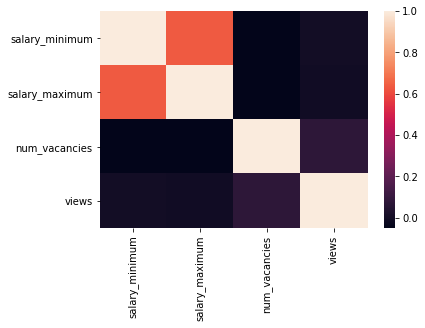

In [15]:
## heatmap
corr = df_job.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [16]:
np.corrcoef([df_job.salary_minimum, df_job.salary_maximum, df_job.num_vacancies, df_job.views])

array([[  1.00000000e+00,   6.36124766e-01,  -5.02982450e-02,
         -7.29620187e-04],
       [  6.36124766e-01,   1.00000000e+00,  -4.81621058e-02,
         -1.22877948e-03],
       [ -5.02982450e-02,  -4.81621058e-02,   1.00000000e+00,
          7.68507898e-02],
       [ -7.29620187e-04,  -1.22877948e-03,   7.68507898e-02,
          1.00000000e+00]])

## Comment .. 
From the heatmap and correlation results above .. the following can be concluded .. 

1. There is some how strong linear relationship between minimum salary and maximum salary for the applicants .. 
2. The correlation between minimum salary and both number of vacancies and jobs views is very weak ! 
3. The correlation is a bit higher in case of maximum salary .. yet it is a weak correlation ..

In [17]:
df_job.describe()

,salary_minimum,salary_maximum,num_vacancies,views
count,21850.000000,21850.000000,21850.000000,21850.000000
mean,3333.283982,5476.040412,5.856934,1376.874737
std,5293.894787,10783.029504,16.633904,1065.109847
min,0.000000,0.000000,1.000000,0.000000
25%,1500.000000,2500.000000,1.000000,797.000000
50%,2500.000000,4000.000000,1.000000,1230.000000
75%,3500.000000,6000.000000,3.000000,1791.000000
max,250000.000000,1000000.000000,100.000000,37568.000000


### Univariate Analysis: 

Let's analyze each variable graphically .. 

Text(0.5,1,u'Frequency of Job Categories Count in Members Data Set')

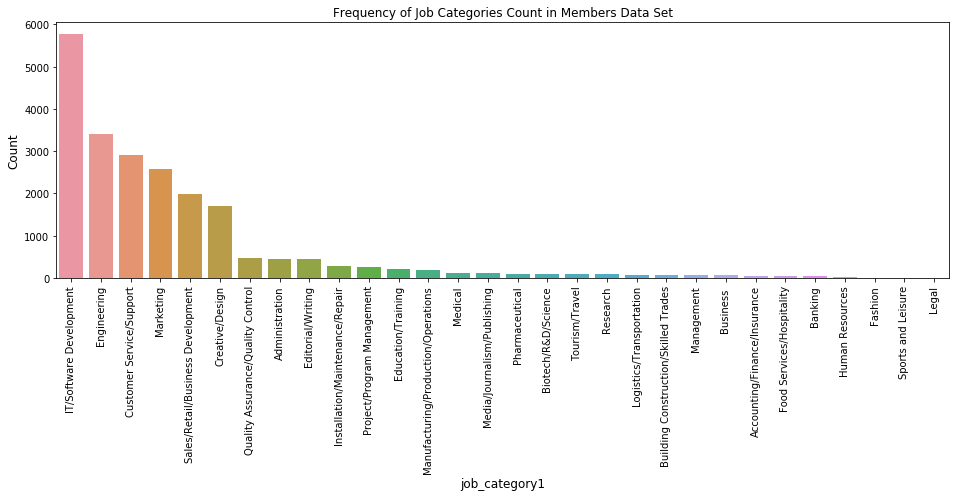

In [18]:
# Job Category1

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_category1", data = df_job, order = df_job.job_category1.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_category1', fontsize=12)
plt.title("Frequency of Job Categories Count in Members Data Set", fontsize=12)

In [19]:
job_cat = Counter(df_job['job_category1']).most_common()
job_cat

[('IT/Software Development', 5762),
 ('Engineering', 3405),
 ('Customer Service/Support', 2917),
 ('Marketing', 2590),
 ('Sales/Retail/Business Development', 1998),
 ('Creative/Design', 1712),
 ('Quality Assurance/Quality Control', 474),
 ('Administration', 459),
 ('Editorial/Writing', 458),
 ('Installation/Maintenance/Repair', 287),
 ('Project/Program Management', 268),
 ('Education/Training', 224),
 ('Manufacturing/Production/Operations', 184),
 ('Medical', 131),
 ('Media/Journalism/Publishing', 112),
 ('Pharmaceutical', 107),
 ('Biotech/R&D/Science', 106),
 ('Tourism/Travel', 89),
 ('Research', 85),
 ('Logistics/Transportation', 74),
 ('Building Construction/Skilled Trades', 71),
 ('Management', 70),
 ('Business ', 62),
 ('Accounting/Finance/Insurance', 56),
 ('Food Services/Hospitality', 53),
 ('Banking', 42),
 ('Human Resources', 28),
 ('Fashion', 11),
 ('Sports and Leisure', 11),
 ('Legal', 4)]

the most frequent job category within the 1st set of categories is "IT/Software Development" that appears 5762 times .. 

the least term is "Legal" that appears only 4 times .. 

Text(0.5,1,u'Frequency of job Titles Count in Members Data Set')

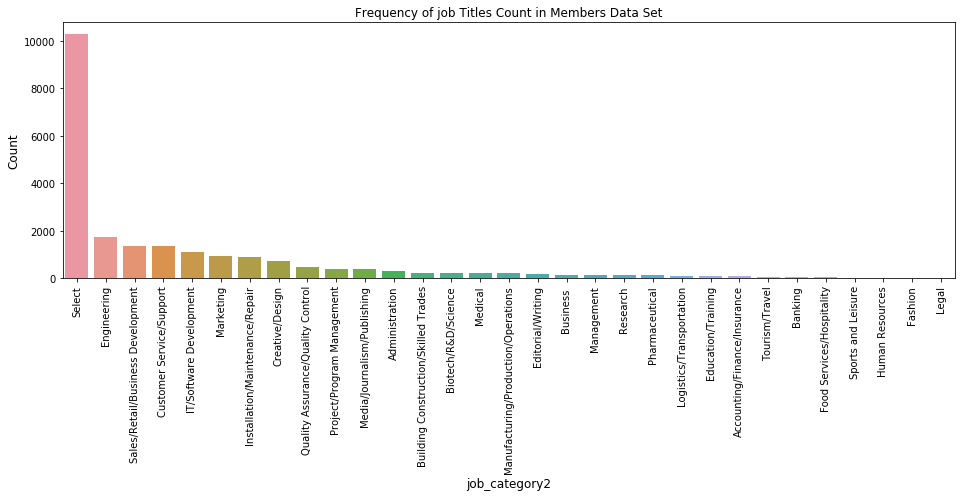

In [20]:
# job_category2

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_category2", data = df_job, order = df_job.job_category2.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_category2', fontsize=12)
plt.title("Frequency of job Titles Count in Members Data Set", fontsize=12)

In [21]:
job_cat = Counter(df_job['job_category2']).most_common()
job_cat

[('Select', 10259),
 ('Engineering', 1716),
 ('Sales/Retail/Business Development', 1351),
 ('Customer Service/Support', 1330),
 ('IT/Software Development', 1077),
 ('Marketing', 926),
 ('Installation/Maintenance/Repair', 904),
 ('Creative/Design', 702),
 ('Quality Assurance/Quality Control', 481),
 ('Project/Program Management', 399),
 ('Media/Journalism/Publishing', 385),
 ('Administration', 283),
 ('Building Construction/Skilled Trades', 216),
 ('Manufacturing/Production/Operations', 211),
 ('Medical', 211),
 ('Biotech/R&D/Science', 211),
 ('Editorial/Writing', 179),
 ('Business ', 138),
 ('Management', 129),
 ('Research', 127),
 ('Pharmaceutical', 110),
 ('Logistics/Transportation', 107),
 ('Education/Training', 100),
 ('Accounting/Finance/Insurance', 76),
 ('Tourism/Travel', 63),
 ('Banking', 53),
 ('Food Services/Hospitality', 52),
 ('Sports and Leisure', 17),
 ('Human Resources', 16),
 ('Fashion', 14),
 ('Legal', 7)]

The job category of "Select" appears the most in the dataset of 10259.. followed by "Engineering" that appears 1716 times
and the least number of jobs categories goes to "Legal" 

Text(0.5,1,u'Frequency of Job Categories Count in Members Data Set')

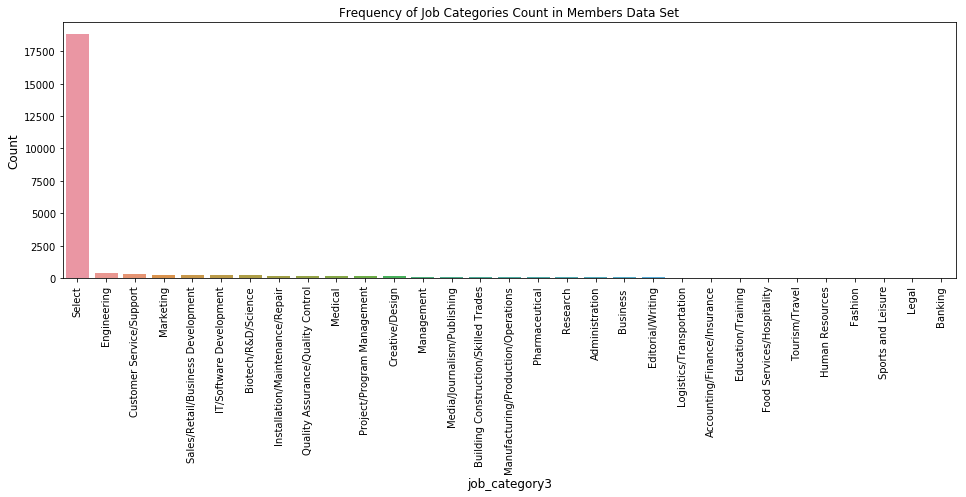

In [22]:
# job category3

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_category3", data = df_job, order = df_job.job_category3.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_category3', fontsize=12)
plt.title("Frequency of Job Categories Count in Members Data Set", fontsize=12)

In [23]:
job_cat = Counter(df_job['job_category3']).most_common()
job_cat

[('Select', 18788),
 ('Engineering', 356),
 ('Customer Service/Support', 313),
 ('Marketing', 255),
 ('Sales/Retail/Business Development', 244),
 ('IT/Software Development', 203),
 ('Biotech/R&D/Science', 197),
 ('Installation/Maintenance/Repair', 191),
 ('Quality Assurance/Quality Control', 139),
 ('Medical', 137),
 ('Project/Program Management', 133),
 ('Creative/Design', 126),
 ('Management', 90),
 ('Media/Journalism/Publishing', 82),
 ('Building Construction/Skilled Trades', 75),
 ('Manufacturing/Production/Operations', 66),
 ('Pharmaceutical', 64),
 ('Research', 58),
 ('Administration', 56),
 ('Business ', 50),
 ('Editorial/Writing', 48),
 ('Logistics/Transportation', 30),
 ('Accounting/Finance/Insurance', 28),
 ('Education/Training', 27),
 ('Food Services/Hospitality', 26),
 ('Tourism/Travel', 22),
 ('Human Resources', 16),
 ('Fashion', 13),
 ('Sports and Leisure', 10),
 ('Legal', 4),
 ('Banking', 3)]

Wow ! .. 

The job category of "Select" appears in the 3rd category column more than within the 2nd category .. of 18788 times ..

the least word is "Banking" that appears only 3 times .. compared to 53 times within the 2nd category and 42 within the 1st set of categories 

In [24]:
# job_title

job_tit = Counter(df_job['job_title']).most_common()
job_tit

[('Graphic Designer', 363),
 ('Call Center Agent', 204),
 ('Social Media Specialist', 178),
 ('Sales Engineer', 171),
 ('Web Developer', 146),
 ('Marketing Specialist', 130),
 ('Customer Service Representative', 129),
 ('Web Designer', 127),
 ('PHP Developer', 127),
 ('Customer Service Agent', 116),
 ('Telesales Agent', 110),
 ('Senior PHP Developer', 94),
 ('Software Developer', 93),
 ('Marketing Manager', 92),
 ('Marketing Executive', 91),
 ('Java Developer', 86),
 ('iOS Developer', 79),
 ('Digital Marketing Specialist', 77),
 ('Graphic Designer ', 77),
 ('Senior .Net Developer', 75),
 ('Android Developer', 73),
 ('Project Manager', 69),
 ('Senior Java Developer', 69),
 ('IT Specialist', 66),
 ('Senior Software Developer', 63),
 ('Sales Account Manager', 61),
 ('.Net Developer', 60),
 ('Interior Designer', 60),
 ('Mechanical Engineer', 58),
 ('Site Engineer', 56),
 ('Architect', 55),
 ('Project Coordinator', 53),
 ('Senior Android Developer', 53),
 ('E-Marketing Specialist', 51),
 ('

The most frequent job title in this data set is "Graphic Designer" that appears 363 while the least is "Mechanical / Electrical Engineer" that appears only 3 times .. 

In [25]:
# city

job_city = Counter(df_job['city']).most_common()
job_city

[('Cairo', 14988),
 ('Giza', 3886),
 ('Alexandria', 989),
 ('6th of October', 90),
 ('Mansoura', 89),
 ('New Cairo', 85),
 ('10th of Ramadan', 81),
 ('Any', 60),
 ('Giza / Cairo', 45),
 ('Ismailia', 39),
 ('10th of ramadan city', 36),
 ('Cairo / Giza', 36),
 ('6th of October City', 35),
 ('Tanta', 32),
 ('nasr city', 32),
 ('menoufia', 31),
 ('6 October', 30),
 ('\xd8\xa7\xd9\x84\xd9\x82\xd8\xa7\xd9\x87\xd8\xb1\xd8\xa9', 29),
 ('10th of Ramdan City', 26),
 ('Suez', 26),
 ('6 of October', 24),
 ('Hurghada', 22),
 ('Assuit', 20),
 ('Obour city', 20),
 ('maadi', 20),
 ('all', 19),
 ('Nasr City, Cairo', 19),
 ('cairo, giza', 19),
 ('Ismalia', 18),
 ('Cairo/ Giza', 16),
 ('Egypt', 14),
 ('Alexandria & Cairo', 13),
 ('alex', 12),
 ('Port Said', 12),
 ('Cairo & alexandria', 12),
 ('Cairo - Giza', 12),
 ('6th october', 12),
 ('Qalyubia', 12),
 ('ASWAN', 12),
 ('All over Egypt', 11),
 ('red sea', 11),
 ('\xd8\xa7\xd9\x84\xd8\xac\xd9\x8a\xd8\xb2\xd8\xa9', 11),
 ('Upper Egypt', 10),
 ('Cairo/Giza

It seems there are typo in this column .. i.e. the field of (\xd9\x85\xd8\xaf\xd9\x8a\xd9\x86\xd9\x87 \xd9\x86\xd8\xb5\xd8\xb1) ! .. this is invalid city name !  ..

Meanwhile, the most frequent city is Cairo .. that appears 14988 times within the data set, while both 'Tanta - Mounfia -Mansoura' appear only one time in the data .. 

Text(0.5,1,u'Frequency of Job Indusrty Count in Members Data Set')

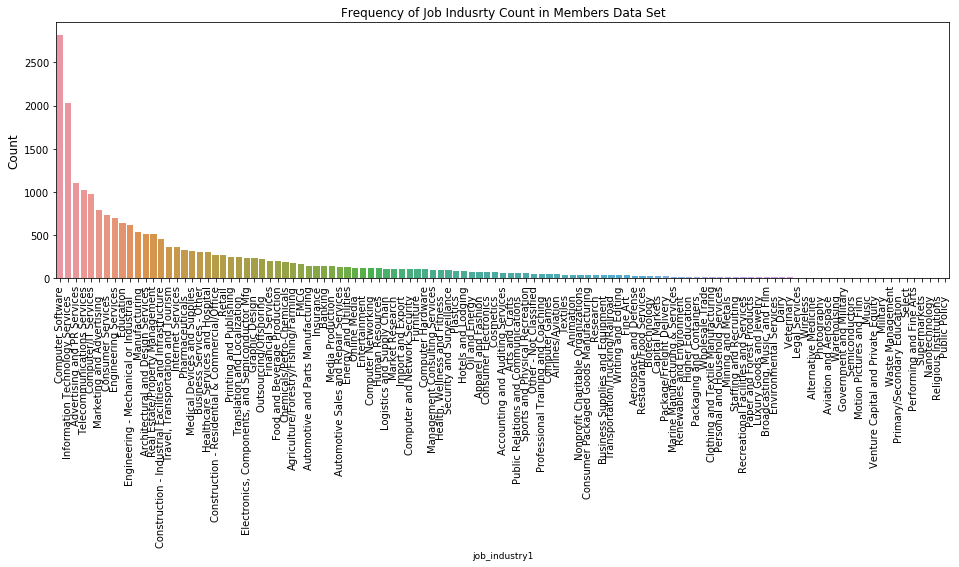

In [26]:
# job_industry1

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_industry1", data = df_job, order = df_job.job_industry1.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('job_industry1', fontsize = 9)
plt.title("Frequency of Job Indusrty Count in Members Data Set", fontsize=12)

wow ! .. 

It seems there are a lot of job industries within the data set .. 

In [27]:
job_ind = Counter(df_job['job_industry1']).most_common()
job_ind

[('Computer Software', 2824),
 ('Information Technology Services   ', 2029),
 ('Advertising and PR Services', 1108),
 ('Telecommunications Services', 1021),
 ('Computer/IT Services', 976),
 ('Marketing and Advertising   ', 795),
 ('Consumer Services   ', 727),
 ('Engineering Services', 692),
 ('Education', 634),
 ('Engineering - Mechanical or Industrial   ', 616),
 ('Manufacturing', 535),
 ('Architectural and Design Services', 510),
 ('Real Estate/Property Management', 507),
 ('Construction - Industrial Facilities and Infrastructure', 451),
 ('Travel, Transportation and Tourism', 365),
 ('Internet Services', 365),
 ('Pharmaceuticals   ', 327),
 ('Medical Devices and Supplies', 314),
 ('Business Services - Other', 300),
 ('Healthcare Services and Hospital', 299),
 ('Construction - Residential & Commercial/Office', 269),
 ('Retail', 266),
 ('Printing and Publishing', 249),
 ('Translation and Localization   ', 248),
 ('Electronics, Components, and Semiconductor Mfg', 232),
 ('Graphic Desi

'Computer Software' appears the most in the 1st set of job industries .. while 'Religious Institutions' appears single time .. 

Text(0.5,1,u'Frequency of Job Indusrty Count in Members Data Set')

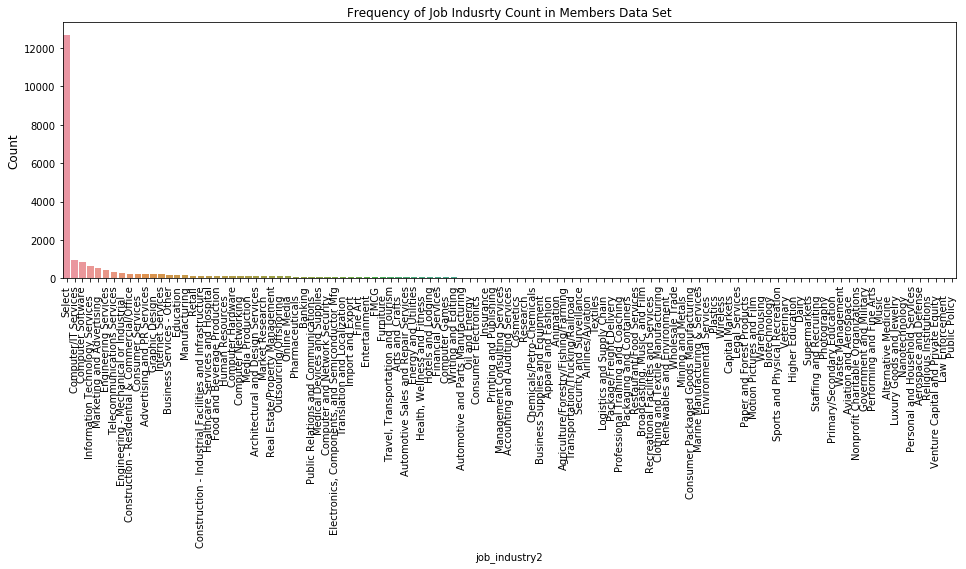

In [28]:
# job_industry2

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_industry2", data = df_job, order = df_job.job_industry2.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_industry2', fontsize=10)
plt.title("Frequency of Job Indusrty Count in Members Data Set", fontsize=12)

very sparse data ! .. 

In [29]:
job_ind = Counter(df_job['job_industry2']).most_common()
job_ind

[('Select', 12701),
 ('Computer/IT Services', 943),
 ('Computer Software', 847),
 ('Information Technology Services   ', 631),
 ('Marketing and Advertising   ', 542),
 ('Engineering Services', 417),
 ('Telecommunications Services', 335),
 ('Engineering - Mechanical or Industrial   ', 275),
 ('Construction - Residential & Commercial/Office', 241),
 ('Consumer Services   ', 228),
 ('Advertising and PR Services', 219),
 ('Graphic Design   ', 214),
 ('Internet Services', 212),
 ('Business Services - Other', 186),
 ('Education', 167),
 ('Manufacturing', 164),
 ('Retail', 126),
 ('Construction - Industrial Facilities and Infrastructure', 120),
 ('Healthcare Services and Hospital', 114),
 ('Food and Beverage Production', 112),
 ('Human Resources   ', 109),
 ('Computer Hardware', 108),
 ('Computer Networking   ', 97),
 ('Media Production   ', 96),
 ('Architectural and Design Services', 96),
 ('Market Research   ', 95),
 ('Real Estate/Property Management', 94),
 ('Outsourcing/Offshoring   ', 93

The sparsity in the data within this columns comes from the gao between the highest and lowest job industry .. 

Select is the highest with count of 12701 while the least is also 'Religious Institutions' that appears single time as well .. 

Text(0.5,1,u'Frequency of Job Indusrty Count in Members Data Set')

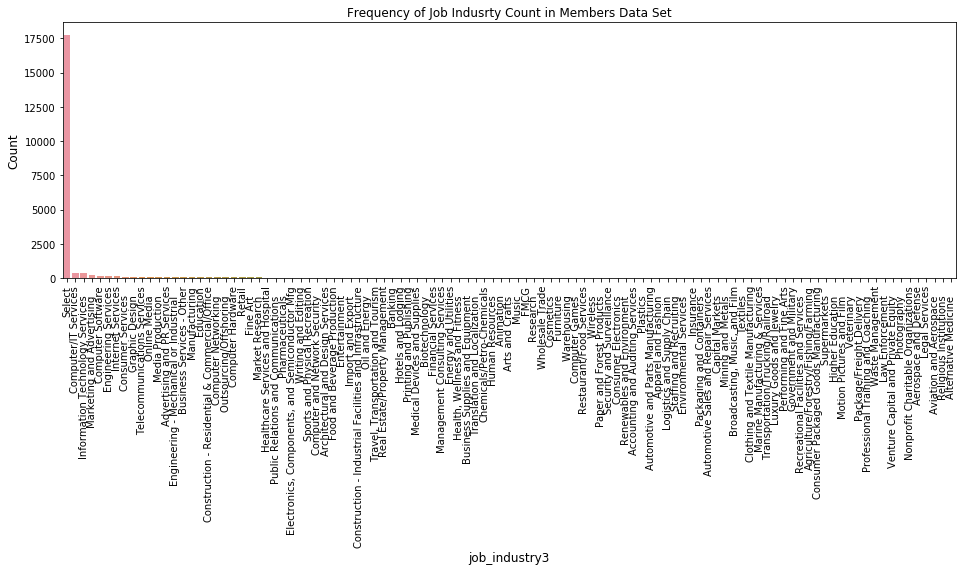

In [30]:
# job_industry3

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "job_industry3", data = df_job, order = df_job.job_industry3.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('job_industry3', fontsize=12)
plt.title("Frequency of Job Indusrty Count in Members Data Set", fontsize=12)

The sparsity in the third list is even more severe ! .. 

let's check the counts ..

In [31]:
job_ind = Counter(df_job['job_industry3']).most_common()
job_ind

[('Select', 17776),
 ('Computer/IT Services', 381),
 ('Information Technology Services   ', 379),
 ('Marketing and Advertising   ', 230),
 ('Computer Software', 193),
 ('Engineering Services', 185),
 ('Internet Services', 133),
 ('Consumer Services   ', 103),
 ('Graphic Design   ', 101),
 ('Telecommunications Services', 101),
 ('Online Media   ', 95),
 ('Media Production   ', 93),
 ('Advertising and PR Services', 92),
 ('Engineering - Mechanical or Industrial   ', 89),
 ('Business Services - Other', 87),
 ('Manufacturing', 75),
 ('Education', 74),
 ('Construction - Residential & Commercial/Office', 68),
 ('Computer Networking   ', 59),
 ('Outsourcing/Offshoring   ', 55),
 ('Computer Hardware', 52),
 ('Retail', 52),
 ('Fine Art   ', 51),
 ('Market Research   ', 50),
 ('Healthcare Services and Hospital', 48),
 ('Public Relations and Communications   ', 47),
 ('Pharmaceuticals   ', 46),
 ('Electronics, Components, and Semiconductor Mfg', 44),
 ('Writing and Editing', 41),
 ('Sports and Ph

'Select' is also on top with a count of 17776 .. 'Religious Institutions' still at the end with a count of one !

Text(0.5,1,u'Frequency of Career Level Count in Members Data Set')

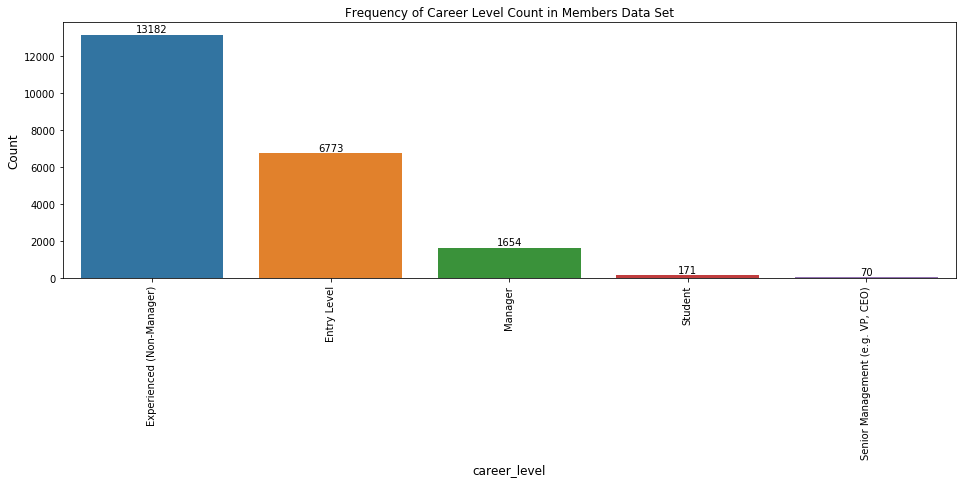

In [32]:
# career_level

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "career_level", data = df_job, order = df_job.career_level.value_counts().iloc[:].index) 

# show labels 
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='black', ha='center', va='bottom')
    
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('career_level', fontsize=12)
plt.title("Frequency of Career Level Count in Members Data Set", fontsize=12)

The majority of the career levels in Wuzzuf data set is from "Experienced (Non-Managers)" .. followed by "Entry Level" and the least number of applications are related to Senior Management (i.e. CEO)  

In [33]:
# job_requirements

job_ind = Counter(df_job['job_requirements']).most_common()
job_ind

[(nan, 2633),
 ('<ul>\r\n<li>Fluent or very good English skills.</li>\r\n<li>Able to work under pressure.</li>\r\n<li>High communication and negotiation skills.</li>\r\n<li>Maximum age is 33.</li>\r\n<li>Fresh graduates are welcome to apply.</li>\r\n<li>No Nationality restriction.</li>\r\n</ul>',
  38),
 ('<strong>How to qualify:<br /></strong><br />\r\n<ul>\r\n<li>B.Sc. in Computer Science or related discipline.</li>\r\n<li>Minimum two years of testing experience.</li>\r\n<li>Fundamental knowledge of software development lifecycles.</li>\r\n<li>MS SQL query building fundamental knowledge.</li>\r\n<li>Knowledge in testing tools and bug tracking is an asset.</li>\r\n<li>Knowledge in test automation is an asset.</li>\r\n<li>Experience in testing web applications is a plus.</li>\r\n</ul>\r\n<br />\r\n<p><strong>Non-technical qualifications:<br /></strong></p>\r\n<ul>\r\n<li>Excellent problem solving and trouble shooting skills.</li>\r\n<li>Excellent and effective communication skills.</li

Job requierements column contains pragraph for each job .. in also, contains 2633 job application without requirements .. !

Text(0.5,1,u'Frequency of Payment Period Count in Members Data Set')

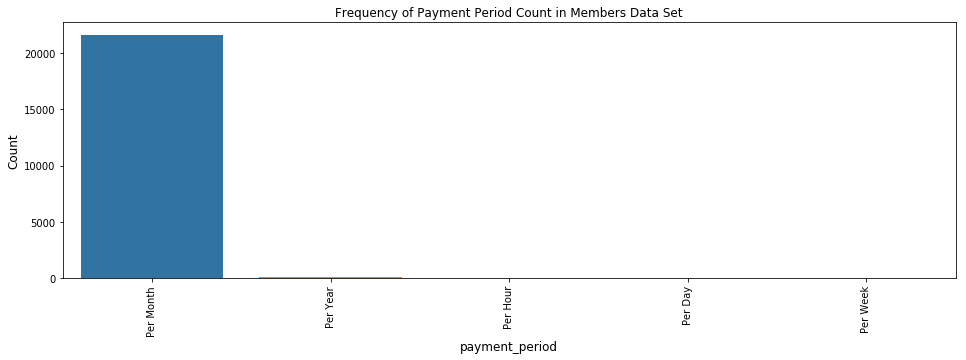

In [34]:
# payment_period

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "payment_period", data = df_job, order = df_job.payment_period.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_period', fontsize=12)
plt.title("Frequency of Payment Period Count in Members Data Set", fontsize=12)

Almost all the jobs pay per month for their employess .. except very few jobs pay per year ! .. 

We can make further analysis to check the titles of those jobs .. 

In [35]:
job_pay = Counter(df_job['payment_period']).most_common()
job_pay

[('Per Month', 21642),
 ('Per Year', 123),
 ('Per Hour', 59),
 ('Per Day', 18),
 (nan, 5),
 ('Per Week', 3)]

OMG ! .. 

It seems that the chart above doesn't accurate enough to plot all the types .. may be due to the gap between the highest 
payment peiod and the rest .. 

Yet, the majority take their salaries per month and only three applications' salaries are per week .. 

5 rows are empty with NAs values ..

Text(0.5,1,u'Frequency of Currency Count in Members Data Set')

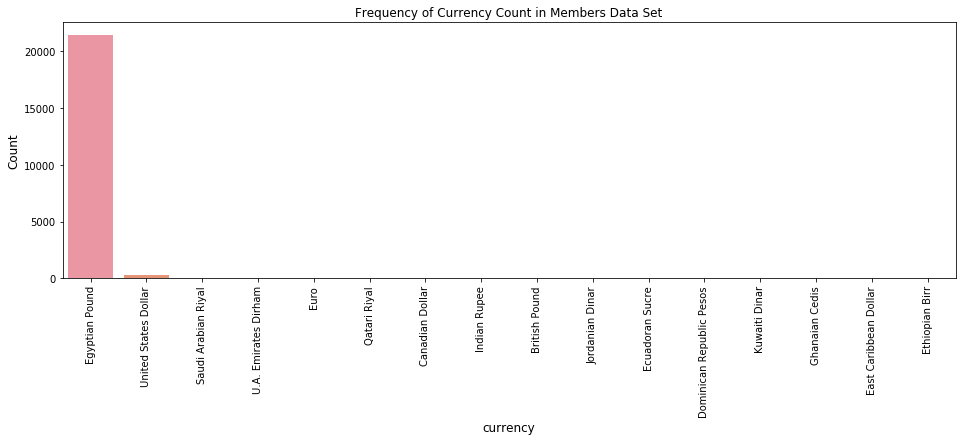

In [36]:
#currency

plt.figure(figsize=(16,16))
plt.subplot(311)
sns.countplot(x = "currency", data = df_job, order = df_job.currency.value_counts().iloc[:].index)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=12)
plt.xlabel('currency', fontsize=12)
plt.title("Frequency of Currency Count in Members Data Set", fontsize=12)

More than 20000 applications pay their salaries by EGP and only few pay by USD .. 

In [37]:
job_pay = Counter(df_job['currency']).most_common()
job_pay

[('Egyptian Pound', 21476),
 ('United States Dollar', 254),
 ('Saudi Arabian Riyal', 67),
 ('U.A. Emirates Dirham', 16),
 ('Euro', 11),
 (nan, 5),
 ('Qatari Riyal', 5),
 ('Canadian Dollar', 4),
 ('Jordanian Dinar', 2),
 ('Indian Rupee', 2),
 ('British Pound', 2),
 ('Kuwaiti Dinar', 1),
 ('Ethiopian Birr', 1),
 ('Ghanaian Cedis', 1),
 ('Ecuadoran Sucre', 1),
 ('Dominican Republic Pesos', 1),
 ('East Caribbean Dollar', 1)]

Again .. the numerical count is more accurate as it lists the count of each corresponding currency .. 

Precisely 21576 applications pay using EGP, and single application pay by 'Kuwaiti Dinar' .. the same case is for 'Ethiopian Birr', 'Ghanaian Cedis', 'Ecuadoran Sucre', 'Dominican Republic Pesos' and 'East Caribbean Dollar' as well ..

Also, 5 rows are empty .. each of which is corresponding to job application that are not stated its currency .. 

In fact .. the next step is to do bivariate analysis .. 

however, I'm gonna perform data cleaning step prior to the bivariate .. so that the bivariate analysis is performed on a cleaned version for all the columns .. 


## Data Cleaning: 

So far, as mentioned above .. some columns contains NAs and some others contains typo (invalid cell value) .. 

### Filling NAs .. 
Let's clean them up starting with the four variables contain NAs (i.e. job_description, job_requirements, payment_period and currency)

In [38]:
# job_description 

job_desc = Counter(df_job['job_description']).most_common()
job_desc

[(nan, 274),
 ('<ul>\r\n<li>Responsible for taking inbound calls for prospective customers, handling customer inquiries in a courteous and professional manner while providing the highest level of customer service.</li>\r\n<li>Provide responsive and competent telephone support to customers in the areas of problem solving and handling customer inquiries.</li>\r\n<li>Typically would not have sales goals/quotas.</li>\r\n<li>Apply basic working knowledge of systems, procedures, customers, products and processes to perform assigned functions with moderate reliance on others for direction.</li>\r\n<li>Work requires some judgment but is performed primarily according to standard procedures with close supervision</li>\r\n<li>Provide responsive and competent customer support within a call center environment.</li>\r\n<li>Ensure that all customer issues are resolved at the first instance.</li>\r\n<li>May respond to customer inquiries by referring them to published materials, secondary sources or mo

274 missing value .. 

I can fill these missing cells by the mode of the variable as this is a categorical variable ..

However, this makes none sense .. dut to the nature of the variable that is a description of each job that is almost unique for similar jobs (i.e. all "Data Analysts" jobs might share some common descriptions in their posts) .. 

Hence, I'll try to group the posts by (job title) and then fill in the NAs in the description column based on the job title

In [39]:
# df_job.groupby('job_title').groups

In [40]:
# job requirements NAs 

In [41]:
# payment_period 

job_payment = Counter(df_job['payment_period']).most_common()
job_payment

[('Per Month', 21642),
 ('Per Year', 123),
 ('Per Hour', 59),
 ('Per Day', 18),
 (nan, 5),
 ('Per Week', 3)]

In [42]:
df_job['payment_period'] = df_job.fillna(df_job.payment_period.mode(), inplace=True)

In [43]:
df_job['payment_period'].isnull().any().any() # check if NAs are there !

False

It is done :D ..

payment_period variable is a categorical variable that has (Per month) as the most frequent period .. 

this is why the NAs are filled by this most frequent value .. and now the variable hasn't got any missing values.

In [44]:
# payment_period 

job_currency = Counter(df_job['currency']).most_common()
job_currency

[('Egyptian Pound', 21476),
 ('United States Dollar', 254),
 ('Saudi Arabian Riyal', 67),
 ('U.A. Emirates Dirham', 16),
 ('Euro', 11),
 (nan, 5),
 ('Qatari Riyal', 5),
 ('Canadian Dollar', 4),
 ('Jordanian Dinar', 2),
 ('Indian Rupee', 2),
 ('British Pound', 2),
 ('Kuwaiti Dinar', 1),
 ('Ethiopian Birr', 1),
 ('Ghanaian Cedis', 1),
 ('Ecuadoran Sucre', 1),
 ('Dominican Republic Pesos', 1),
 ('East Caribbean Dollar', 1)]

Only 5 NAs .. 

We can remove them as these are just 5 rows out of > 21000 rows in total .. 

however, let's fill them with the mode so that the data is complete ! 

In [45]:
df_job['currency'] = df_job.fillna(df_job.currency.mode(), inplace=True)

In [46]:
df_job['currency'].isnull().any().any()

False

Voila :D ..

The currency variable is now complete without any missing values .. 

### Manipulating typo !

(city) variable contains invalid values in some cells as stated above in the univariate analysis .. 

as this is a categorical variable .. we can replace these invalid cells with the (mode) of the columns .. that is the most frequent city within the whole column (i.e. Cairo) or even remove the rows contain these cells .. let's decide after counting their values ..

After checking their values (from the univariate analysis above for the "city" variable) .. I think it's better not to remove them as they have large number ! .. Yet, it's better to be replaced and the common feature in them is that all of them contain this symbol (\) .. hence, let's search for this symbol and replace its cell with the mode ..  

In [47]:
# # df_job['city'].replace(
# #     to_replace=['\'],
# #     value=df_job.city.mode(),
# #     inplace=True
# # )
                

# import re
# re.search("'\'", df_job['city'])

# # el mafrood to check el cells elli feha deh \ then replace them b el mode w feh single cell feha too much 22222 .. 
# ## momken ne substring deh .. 

### Bivariate analysis: 

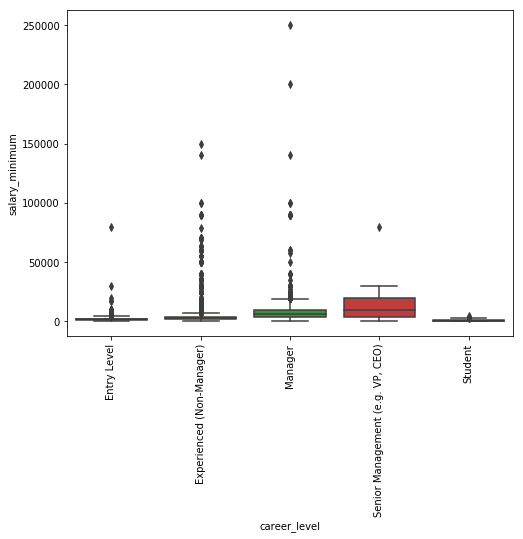

In [48]:
# min_salary vs career level

df_sal_career = pd.concat([df_job['salary_minimum'], df_job['career_level']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'career_level', y = "salary_minimum", data = df_sal_career)

The range of minimum_salaries for "Senior Management - i.e. CEO" is high and contains single outlier .. 

However, the range of values for the rest of career_level types is smaller, yet, contains a lot of outliers except for (Manager) type.

The type of career_level that has the least minimum_salary is "Student" 

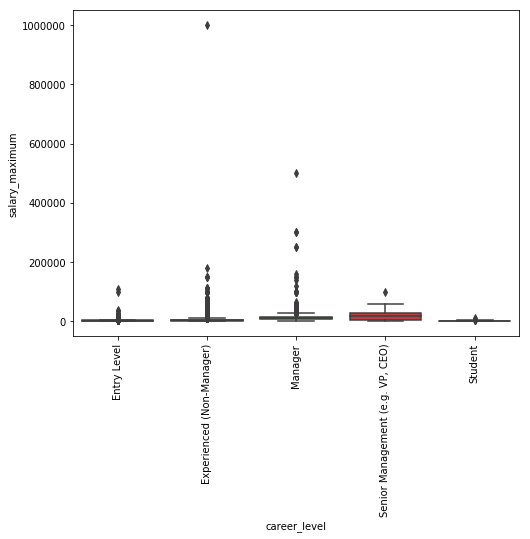

In [49]:
# max_salary vs career level

df_sal_career = pd.concat([df_job['salary_maximum'], df_job['career_level']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'career_level', y = "salary_maximum", data = df_sal_career)

The disperssion of values for "Senior Management" in case of maximum_salaries is less than for minimum_salaries .. however, it still has the maximum range of values within all other career_levels .. 

Meanwhile, experienced (non_managers) type has a lot of outliers especially that one of (1000,000) .. 

Yet, "student" has the minimum salary values 

KeyboardInterrupt: 

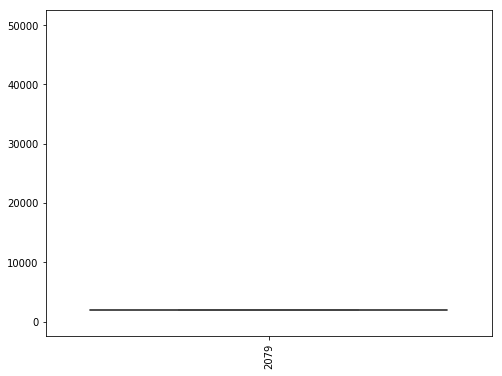

In [50]:
# maximum vs currency

df_sal_career = pd.concat([df_job['salary_maximum'], df_job['currency']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'currency', y = "salary_maximum", data = df_sal_career)

In [ ]:
# minimum vs currency 

df_sal_career = pd.concat([df_job['salary_minimum'], df_job['currency']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'currency', y = "salary_minimum", data = df_sal_career)

The dispersion of minimum values is in general higher than of maximum values .. especially for USD, Canadian Dollar and Saudi Arabian Riyal .. 

that are scattered over higher range of values with lots of outliers in case of USD ..

EGP still suffers from huge number of outliers .. 

### Post_date:
Post_date variable is in the form of date_time .. it will be hard working on it in this format .. 

let's extract day, month and year from this variable and check if there is a relation between those montioned (i.e. day, month or year) and the other variables .. i.e. is there certain year has peak in either minimum or maximum salaries ?! ..  

In [ ]:
df_job['post_year'] = pd.DatetimeIndex(df_job['post_date']).year
df_job['post_year'].unique()

This is expected :D .. the data set contains records from 2014 to 2016 published jobs ..  

In [ ]:
df_job['post_month'] = pd.DatetimeIndex(df_job['post_date']).month
df_job['post_month'].unique()

there are posts related to every month within the year .. !

In [ ]:
df_job['post_day'] = pd.DatetimeIndex(df_job['post_date']).day
df_job['post_day'].unique()

It seems we have posts on a daily basis within the month ..

In [ ]:
# max_salary vs post_year

df_sal_career = pd.concat([df_job['salary_maximum'], df_job['post_year']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_year', y = "salary_maximum", data = df_sal_career)

The dispersion of maximum salaries is the highest in 2015 .. and the lowest in 2016 .. 

However, in general the three years suffer from outliers .. 

Let's check if the same pattern exists for the (range of salary values .. i.e. maximum - minimum) 

Yet, before doing this .. let's check if there is a relationship between minimum and maximum salaries .. 

In [ ]:
## min vs max salaries

sns.regplot(df_job['salary_minimum'], df_job['salary_maximum'])

### Comment .. 

There is a positive linear relationship between minimum and maximum salaries .. that is whenever the minimum salary increases the maximum is also increases .. 

and it is obvious that we still have that 1000,000 salary value stands there on top ! .. 

Hence, let's work on the range of values (i.e. max - min) instead of repeating the plotting process twice (once for min and another for max salary values) 

In [ ]:
df_job['salary_range'] = df_job['salary_maximum'] - df_job['salary_minimum']
df_job['salary_range'].head()

In [ ]:
# salary_range vs post_year

df_sal_career = pd.concat([df_job['salary_range'], df_job['post_year']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_year', y = "salary_range", data = df_sal_career)

wow ! .. 

It seems we have variations in salaries in 2015 ! .. 

Lots of outliers are there especially that point on 1000,000 ..

Meanwhile, the number of outliers and dispersion of them are less in 2014 and 2016 for the range of salaries compared to maximum salaries .. 

In [ ]:
# salary_range vs post_month

df_sal_career = pd.concat([df_job['salary_range'], df_job['post_month']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_month', y = "salary_range", data = df_sal_career)

Viola ! :D .. 

The huge salary range post of 1000,000 occurs in March .. we also have another less severe outlier in December .. followed by May, and Jan .. 

The salaries in April are a bit clustered with no extreme outliers ..  

In [ ]:
# salary_range vs post_day

df_sal_career = pd.concat([df_job['salary_range'], df_job['post_day']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_day', y = "salary_range", data = df_sal_career)

Precisely, this unique post of 1000,000 occurs in 16th March :D .. 

There are other higher range of salaries post in 29th ..   

We may breakdown the analysis futher to check the time of each post .. and I think this might be of any usefulness cause it might indicate which time within the day the posts of high salaries are published ! ..  

In [ ]:
df_job['post_hour'] = pd.DatetimeIndex(df_job['post_date']).hour
df_job['post_hour'].unique()

In [ ]:
# salary_range vs post_hour

df_sal_career = pd.concat([df_job['salary_range'], df_job['post_hour']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_hour', y = "salary_range", data = df_sal_career)

:) out intersting post was published at 2:00 am ..

There are outliers at 16 and less severe one at 14 .. and it seems we have odd pattern ar 5:00   

In [ ]:
## job views vs  year 

df_sal_career = pd.concat([df_job['views'], df_job['post_year']], axis = 1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x = 'post_year', y = "views", data = df_sal_career)

In general the number of viewers in 2016 is fewer than the other years with less variability and fewer number of outliers .. 

The maximum number of outliers occured in 2014 especially that point of greater than 35000 views !

The above charts only help us idetifying the outliers within the data components (i.e. year, month and day) .. 

however, if we want to check the change of another variable (i.e. number of views) vs this data components .. we should visualize it using line chart .. 

Let's give it a try :) 

In [ ]:
# line charts ..


In [ ]:
## city
# job_requirements
